# Analysing Population Growth in India in comparision to Rest of the World #

*Submitted for fulfilling the requirement of edX Mini project by <b>Vinod Rowmuria</b>, Mumbai*<br />

This jupyter notebook compares the population growth India in comparision to some other countries of the world. The data is obtained from the World Development Indicators dataset.<br />

China and India, the emerging economies in Asia, have the highest populations in comparision to other countries of the world. In terms of area, China is the fourth largest country of the world and India the seventh.<br />

Now, lets see how they compare in terms of population density and growth through the years, along with some other countries.

### My assumptions before analysis ##
1. Population growth in India and China are increasing at an alarming rate.
2. India and China also have highest population densities in comparision to other countries of the world.
3. Population density and popultion growth goes hand in hand, i.e., if one is high other should also be high.

## Initial study of the dataset ##

In [1]:
# Importing pandas, numpy, and matplotlib libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the World Development Indicators dataset

pdata = pd.read_csv('World-Development-Indicators/Indicators.csv')
pdata.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [3]:
# Checking the range of years of the dataset

pdata_yrs = pdata['Year'].unique().tolist()
print("Min year value:", min(pdata_yrs), "\nMax year value:", max(pdata_yrs))

Min year value: 1960 
Max year value: 2015


In [4]:
# Applying filters to check IndicatorName containing string "Population" and for a particular year

pop_indi1 = 'Population'

filter1 = pdata['IndicatorName'].str.contains(pop_indi1)
filter2 = pdata['Year'] == 2014      # Looking for data for the latest year available

pop_2014 = pdata[filter1 & filter2]
pop_2014.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534493,Arab World,ARB,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,2014,4.262272e+00
5534494,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,2.828433e+01
5534495,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2014,2.168099e+00
5534496,Arab World,ARB,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,2014,2.985097e+01
5534497,Arab World,ARB,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2014,2.430487e+01
5534498,Arab World,ARB,"Population, ages 0-14 (% of total)",SP.POP.0014.TO.ZS,2014,3.329521e+01
5534499,Arab World,ARB,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,2014,6.244252e+01
5534500,Arab World,ARB,"Population, female (% of total)",SP.POP.TOTL.FE.ZS,2014,4.824216e+01
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534741,Caribbean small states,CSS,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,2014,8.169043e+00


**Note:** No population data was found for year 2015. So the population data was searched again for the next latest year i.e. 2014<br />

## Preparing for a common DataFrame with selected population data ##
### Indicators selection for analysis###

After studying the above table, the following indicators were selected from the column **IndicatorName**:<br />
* Population density (people per sq. km of land...<br />
* Population growth (annual %)<br />
* Population, total<br />

The intention behind seleting the above indications is to analyse the relations between population density, growth, and total population of countries.

### Creating a DataFrame "pop_den2014" for Population Density of all Countries in 2014 ###

In [5]:
# Looking only for IndicatorName "Population density (people per sq. km of land..." in the above DataFrame

pop_indi2 = 'Population density'

filter3 = pop_2014['IndicatorName'].str.contains(pop_indi2)

pop_den2014 = pop_2014[filter3]
pop_den2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534494,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,28.284334
5534742,Caribbean small states,CSS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,17.323836
5535061,Central Europe and the Baltics,CEB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,93.709435
5535348,East Asia & Pacific (all income levels),EAS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,92.839683
5535746,East Asia & Pacific (developing only),EAP,Population density (people per sq. km of land ...,EN.POP.DNST,2014,126.974025


In [6]:
pop_den2014.shape

(246, 6)

### Creating a DataFrame "pop_gth2014" for Population Growth of all Countries in 2014  ###

In [7]:
# Looking only for IndicatorName "Population growth" in the above DataFrame "pop_2014"

pop_indi3 = 'Population growth'

filter4 = pop_2014['IndicatorName'].str.contains(pop_indi3)

pop_gth2014 = pop_2014[filter4]
pop_gth2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534495,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2014,2.168099
5534743,Caribbean small states,CSS,Population growth (annual %),SP.POP.GROW,2014,0.540954
5535062,Central Europe and the Baltics,CEB,Population growth (annual %),SP.POP.GROW,2014,-0.249333
5535349,East Asia & Pacific (all income levels),EAS,Population growth (annual %),SP.POP.GROW,2014,0.676464
5535747,East Asia & Pacific (developing only),EAP,Population growth (annual %),SP.POP.GROW,2014,0.727007


In [8]:
pop_gth2014.shape

(247, 6)

### Creating a DataFrame "pop_tot2014" for Population, Total of all Countries in 2014 ###

In [9]:
# Looking only for IndicatorName "Population, total" in the above DataFrame "pop_2014"

pop_indi4 = 'Population, total'

filter5 = pop_2014['IndicatorName'].str.contains(pop_indi4)

pop_tot2014 = pop_2014[filter5]
pop_tot2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09


In [10]:
pop_tot2014.shape

(247, 6)

### Merging the DataFrames "Population Density", "Population Growth" and "Population, Total": ###
I need all these data - population density, growth, and total population - side by side per country.
#### 1. First merging the DataFrame "Population density" with "Population growth" to get the DataFrame "pop_den_pop"####

In [11]:
pop_den_pop = pd.merge(pop_den2014, pop_gth2014, on=['CountryCode', 'CountryCode'])
pop_den_pop.head()

,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryName_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y
0,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,28.284334,Arab World,Population growth (annual %),SP.POP.GROW,2014,2.168099
1,Caribbean small states,CSS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,17.323836,Caribbean small states,Population growth (annual %),SP.POP.GROW,2014,0.540954
2,Central Europe and the Baltics,CEB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,93.709435,Central Europe and the Baltics,Population growth (annual %),SP.POP.GROW,2014,-0.249333
3,East Asia & Pacific (all income levels),EAS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,92.839683,East Asia & Pacific (all income levels),Population growth (annual %),SP.POP.GROW,2014,0.676464
4,East Asia & Pacific (developing only),EAP,Population density (people per sq. km of land ...,EN.POP.DNST,2014,126.974025,East Asia & Pacific (developing only),Population growth (annual %),SP.POP.GROW,2014,0.727007


In [12]:
pop_tot2014.shape

(247, 6)

#### 2. Then merging DataFrame "pop_den_pop" with "Population, total" to get the DataFrame "pop_den_pop_tot" ####

In [13]:
pop_den_pop_tot = pd.merge(pop_den_pop, pop_tot2014, on=['CountryCode', 'CountryCode'])
pop_den_pop_tot.head()

,CountryName_x,CountryCode,IndicatorName_x,IndicatorCode_x,Year_x,Value_x,CountryName_y,IndicatorName_y,IndicatorCode_y,Year_y,Value_y,CountryName,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,28.284334,Arab World,Population growth (annual %),SP.POP.GROW,2014,2.168099,Arab World,"Population, total",SP.POP.TOTL,2014,3.852725e+08
1,Caribbean small states,CSS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,17.323836,Caribbean small states,Population growth (annual %),SP.POP.GROW,2014,0.540954,Caribbean small states,"Population, total",SP.POP.TOTL,2014,7.013555e+06
2,Central Europe and the Baltics,CEB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,93.709435,Central Europe and the Baltics,Population growth (annual %),SP.POP.GROW,2014,-0.249333,Central Europe and the Baltics,"Population, total",SP.POP.TOTL,2014,1.034551e+08
3,East Asia & Pacific (all income levels),EAS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,92.839683,East Asia & Pacific (all income levels),Population growth (annual %),SP.POP.GROW,2014,0.676464,East Asia & Pacific (all income levels),"Population, total",SP.POP.TOTL,2014,2.264080e+09
4,East Asia & Pacific (developing only),EAP,Population density (people per sq. km of land ...,EN.POP.DNST,2014,126.974025,East Asia & Pacific (developing only),Population growth (annual %),SP.POP.GROW,2014,0.727007,East Asia & Pacific (developing only),"Population, total",SP.POP.TOTL,2014,2.020657e+09


Removing some unwanted columns from the above DataFrame "pop_den_pop_tot" and then renaming the columns for easy identifiation for our analysis going forward, giving the final DataFrame as "**pop_den_pop_tot1**".

In [14]:
pop_den_pop_tot1 = pop_den_pop_tot.drop(['IndicatorCode_x', 'CountryName_y', 'IndicatorCode_y',
                                        'Year_y', 'CountryName', 'IndicatorCode', 'Year'], axis=1)

pop_den_pop_tot1.rename(columns={'CountryName_x':'CountryName',
                                 'IndicatorName_x':'Indicator_popDensity', 'Year_x':'Year',
                                 'Value_x':'Value_popDensity', 'IndicatorName_y':'Indicator_popGrowth',
                                 'Value_y':'Value_popGrowth', 'IndicatorName':'Indicator_popTotal',
                                 'Value':'Value_popTotal'}, inplace=True)
pop_den_pop_tot1.head()

,CountryName,CountryCode,Indicator_popDensity,Year,Value_popDensity,Indicator_popGrowth,Value_popGrowth,Indicator_popTotal,Value_popTotal
0,Arab World,ARB,Population density (people per sq. km of land ...,2014,28.284334,Population growth (annual %),2.168099,"Population, total",3.852725e+08
1,Caribbean small states,CSS,Population density (people per sq. km of land ...,2014,17.323836,Population growth (annual %),0.540954,"Population, total",7.013555e+06
2,Central Europe and the Baltics,CEB,Population density (people per sq. km of land ...,2014,93.709435,Population growth (annual %),-0.249333,"Population, total",1.034551e+08
3,East Asia & Pacific (all income levels),EAS,Population density (people per sq. km of land ...,2014,92.839683,Population growth (annual %),0.676464,"Population, total",2.264080e+09
4,East Asia & Pacific (developing only),EAP,Population density (people per sq. km of land ...,2014,126.974025,Population growth (annual %),0.727007,"Population, total",2.020657e+09


In [15]:
pop_den_pop_tot1.shape

(246, 9)

In [16]:
# Checking the range of the data in column "Value_popDensity" in the final DataFrame pop_den_pop_tot1

print("In Value_popDensity column:")
p_den = pop_den_pop_tot1['Value_popDensity']
print("Max Value:", max(p_den), "\nMin Value:", min(p_den))

In Value_popDensity column:
Max Value: 19073.0693069307 
Min Value: 0.13715434279449398


In [17]:
# Checking the range of the data in column "Value_popGrowth" in the final DataFrame pop_den_pop_tot1

print("In Value_popGrowth column:")
p_gth = pop_den_pop_tot1['Value_popGrowth']
print("Max Value:", max(p_gth), "\nMin Value:", min(p_gth))

In Value_popGrowth column:
Max Value: 8.08855915954617 
Min Value: -4.19194054987126


In [18]:
# Checking the range of the data in column "Value_popTotal" in the final DataFrame pop_den_pop_tot1

print("In Value_popTotal column:")
p_tot = pop_den_pop_tot1['Value_popTotal']
print("Max Value:", max(p_tot), "\nMin Value:", min(p_tot))

In Value_popTotal column:
Max Value: 7260710677.0 
Min Value: 9893.0


Now let's find the pair-wise relationships if any, between the columns **Value_popDensity**, **Value_popGrowth**, and **Value_popTotal** from the final DataFrame pop_den_pop_tot1:

In [19]:
cols = pop_den_pop_tot1[['Value_popDensity', 'Value_popGrowth']]

cols.corr()

,Value_popDensity,Value_popGrowth
Value_popDensity,1.000000,-0.041044
Value_popGrowth,-0.041044,1.000000


In [20]:
cols = pop_den_pop_tot1[['Value_popDensity', 'Value_popTotal']]

cols.corr()

,Value_popDensity,Value_popTotal
Value_popDensity,1.000000,-0.038989
Value_popTotal,-0.038989,1.000000


In [21]:
cols = pop_den_pop_tot1[['Value_popGrowth', 'Value_popTotal']]

cols.corr()

,Value_popGrowth,Value_popTotal
Value_popGrowth,1.000000,-0.011458
Value_popTotal,-0.011458,1.000000


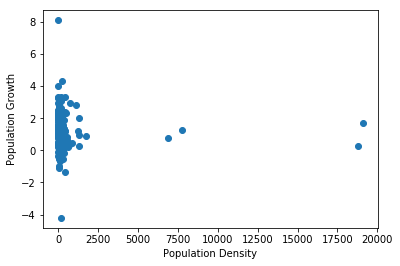

In [22]:
# Defining the axes
x1 = pop_den_pop_tot1[['Value_popDensity']]
y1 = pop_den_pop_tot1[['Value_popGrowth']]

# Label the axes
plt.xlabel('Population Density')
plt.ylabel('Population Growth')

# Scatter plot
plt.scatter(x1, y1)
plt.show()

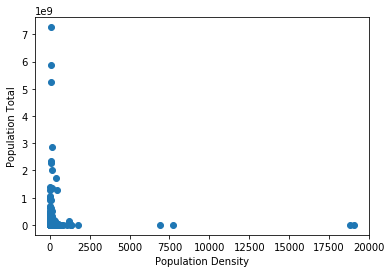

In [23]:
# Defining the axes
x2 = pop_den_pop_tot1[['Value_popDensity']]
y2 = pop_den_pop_tot1[['Value_popTotal']]

# Label the axes
plt.xlabel('Population Density')
plt.ylabel('Population Total')

# Scatter plot
plt.scatter(x2, y2)
plt.show()

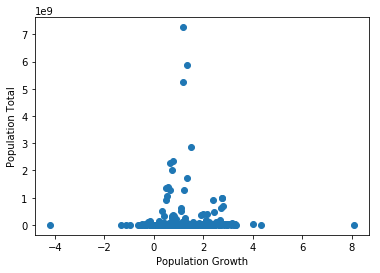

In [24]:
# Defining the axes
x3 = pop_den_pop_tot1[['Value_popGrowth']]
y3 = pop_den_pop_tot1[['Value_popTotal']]

# Label the axes
plt.xlabel('Population Growth')
plt.ylabel('Population Total')

# Scatter plot
plt.scatter(x3, y3)
plt.show()

From the above plots, it appears that Population Density, Population Growth, and Total Population have no clear-cut corelations.

### Selecting some Countries for Scatter Plots ###
Plotting all countries for the scatter plot would clutter the plots. Hence, selecting countries which have Population Density greater than some specific value.<br/>
Now how to find that specific value?<br/><br/>
Let's check the Population Density values of some countries randomly like with CountryCode IND, CHN, USA, etc.

In [25]:
# Like in SQL: select * from table where colume_name = some_value...,
# ...applying similar criteria in the above DataFrame pop_den_pop_tot1

#pop_den_pop_tot1.loc[pop_den_pop_tot1['CountryCode'] == 'IND']
pop_den_pop_tot1.loc[pop_den_pop_tot1['CountryCode'] == 'CHN']

,CountryName,CountryCode,Indicator_popDensity,Year,Value_popDensity,Indicator_popGrowth,Value_popGrowth,Indicator_popTotal,Value_popTotal
73,China,CHN,Population density (people per sq. km of land ...,2014,145.317356,Population growth (annual %),0.506312,"Population, total",1.364270e+09


As seen in this notebook section **In [16]** earlier, the Population Density values ranges from minimum 0.137 to maximum 19073.069.<br />
However, surprisingly for China the Population Density value is just 435.657.<br /><br />
Hence, selecting countries with Population Density greater than 145, to include China.

In [26]:
pop_den_pop_tot1 = pop_den_pop_tot1.loc[pop_den_pop_tot1['Value_popDensity'] > 145]

pop_den_pop_tot1.head()

,CountryName,CountryCode,Indicator_popDensity,Year,Value_popDensity,Indicator_popGrowth,Value_popGrowth,Indicator_popTotal,Value_popTotal
28,South Asia,SAS,Population density (people per sq. km of land ...,2014,360.672582,Population growth (annual %),1.355924,"Population, total",1.721021e+09
36,American Samoa,ASM,Population density (people per sq. km of land ...,2014,277.170000,Population growth (annual %),0.238405,"Population, total",5.543400e+04
37,Andorra,ADO,Population density (people per sq. km of land ...,2014,154.863830,Population growth (annual %),-4.191941,"Population, total",7.278600e+04
39,Antigua and Barbuda,ATG,Population density (people per sq. km of land ...,2014,206.590909,Population growth (annual %),1.011701,"Population, total",9.090000e+04
42,Aruba,ABW,Population density (people per sq. km of land ...,2014,574.672222,Population growth (annual %),0.503970,"Population, total",1.034410e+05


In [27]:
pop_den_pop_tot1.shape

(73, 9)

### Creating Scatter Plots ###

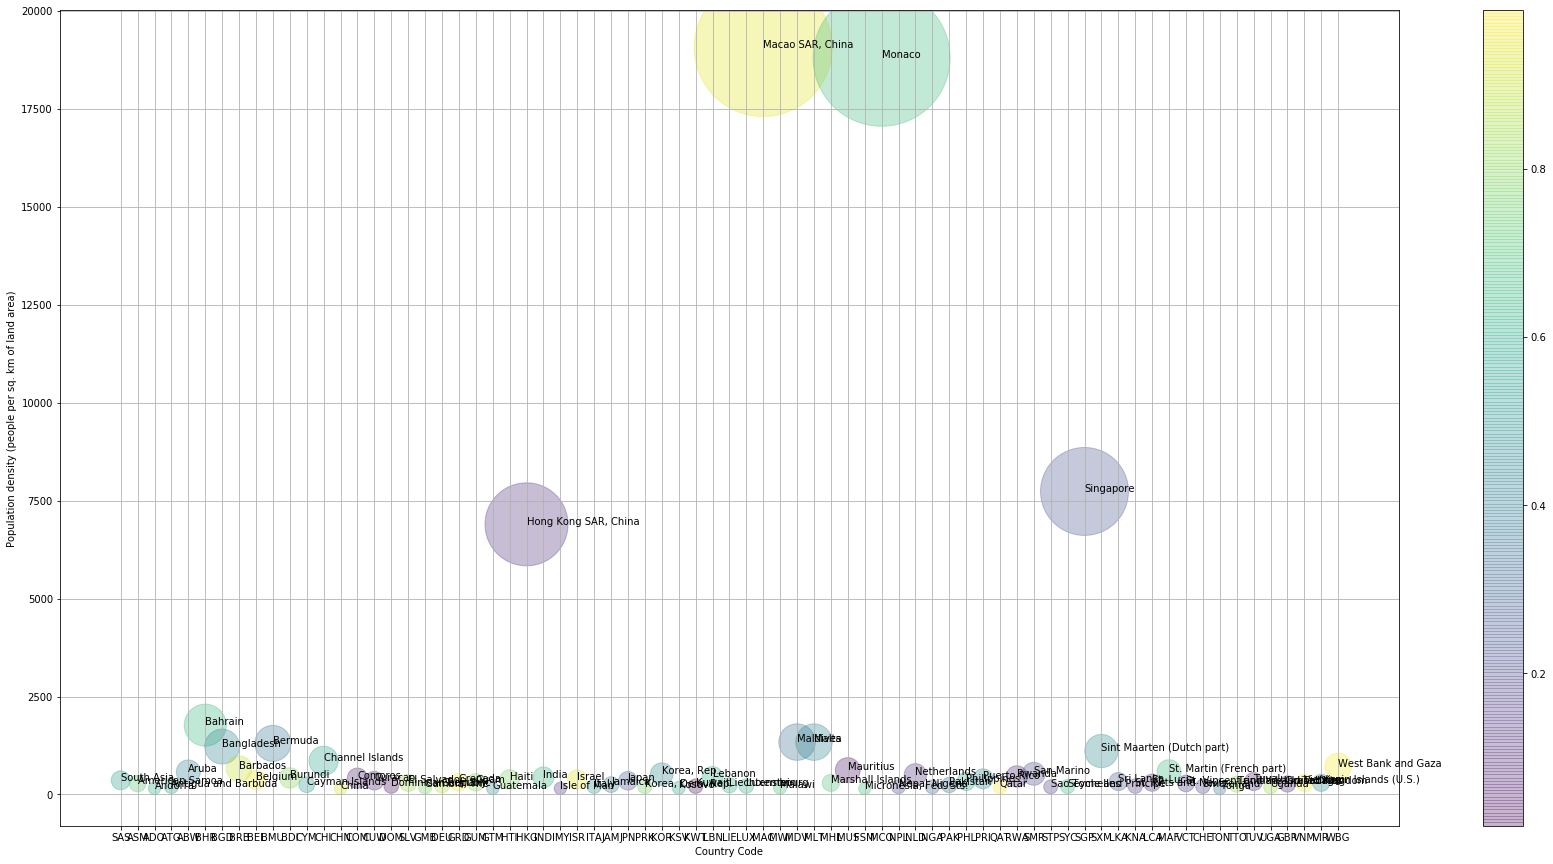

In [28]:
# Create a scatter plot on Population Density

cntry = pop_den_pop_tot1['CountryName'].values

x = pop_den_pop_tot1['CountryCode'].values 
y = pop_den_pop_tot1['Value_popDensity'].values

rng = np.random.RandomState(0)
colors = rng.rand(73)
sizes = y

fig = plt.figure(figsize=(30,15))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]))

plt.xlabel('Country Code')
plt.ylabel(pop_den_pop_tot1['Indicator_popDensity'].iloc[0])
plt.show()

From the above plot it is clear that smaller countries like Macao, Monaco, followed by Hong Kong, Singapore etc., have very high Population Density in comparision to bigger and highly populated countries like China, India, etc.<br /><br />
In fact the highly populated countries like China, India are not at all shown up in this plot!

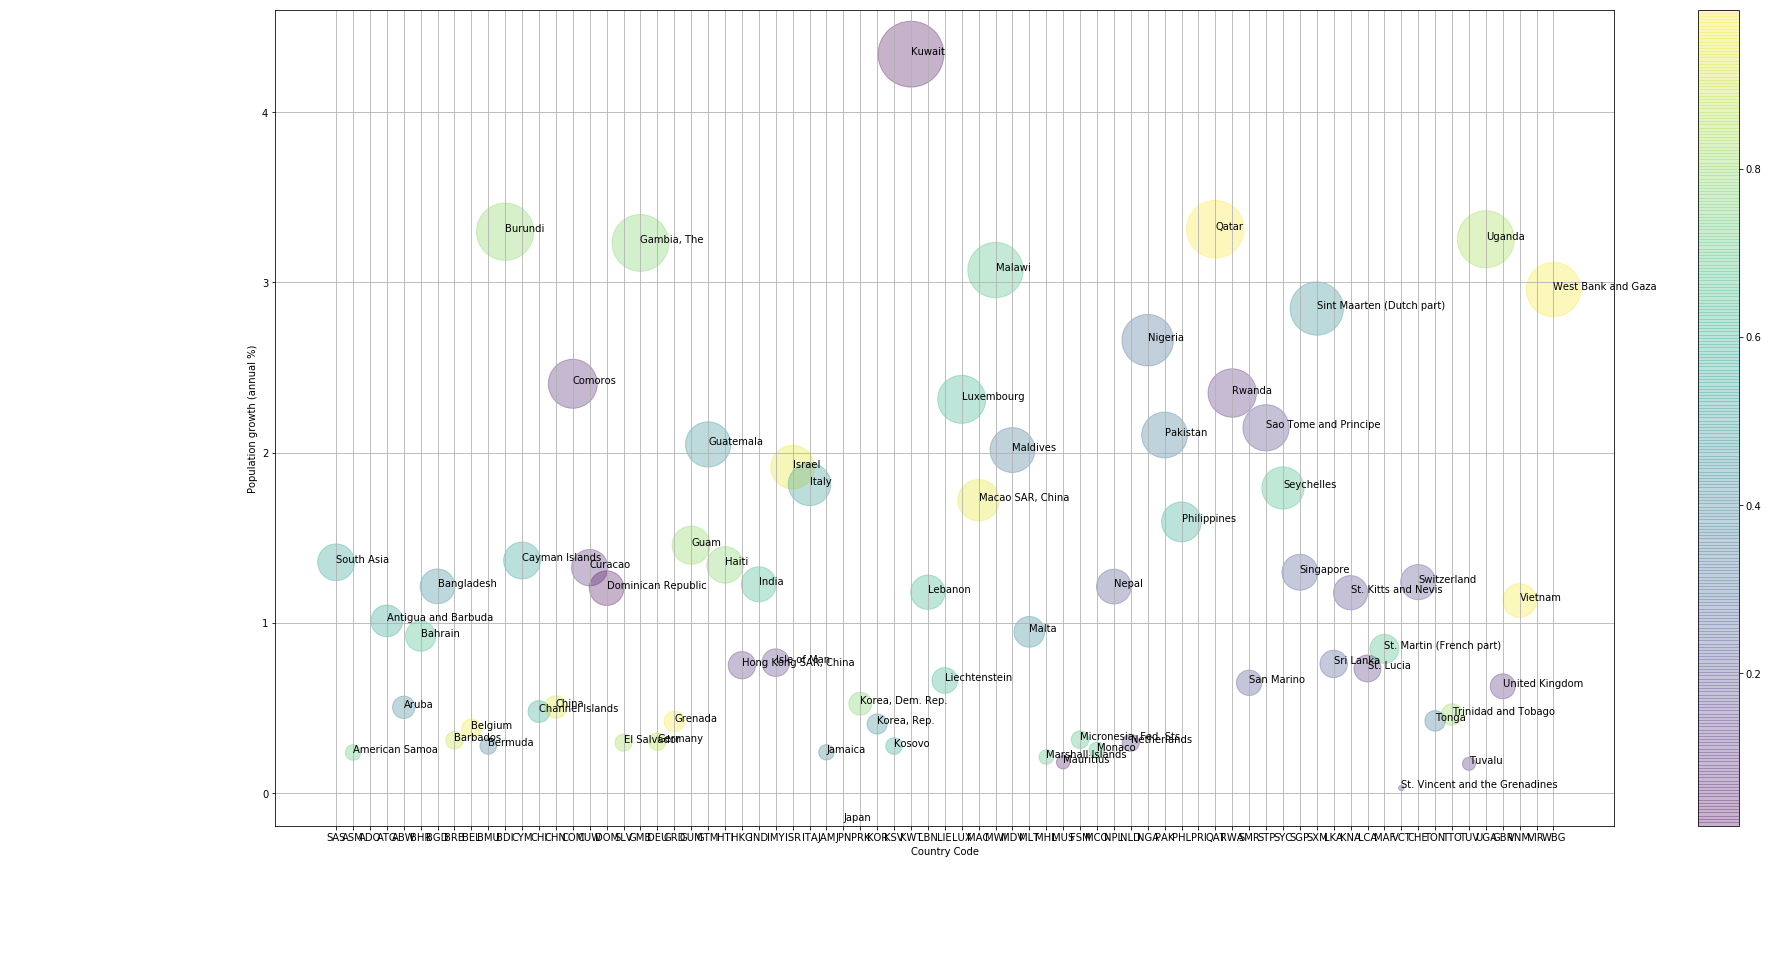

In [29]:
# There are some negative values in the Value_popGrowth column wich is is giving some runtime error.
# To hide the warning temporarily the following arrangement is made with warning message.
# This is done after studying about the nature of the error and suggestions found in the internet community.
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# ---------------------------------------------------------------------------------------------------------

# Create a scatter plot on Population Growth

cntry = pop_den_pop_tot1['CountryName'].values

x = pop_den_pop_tot1['CountryCode'].values 
y = pop_den_pop_tot1['Value_popGrowth'].values

rng = np.random.RandomState(0)
colors = rng.rand(73)
sizes = 1000 * y

fig = plt.figure(figsize=(30,15))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]))

plt.xlabel('Country Code')
plt.ylabel(pop_den_pop_tot1['Indicator_popGrowth'].iloc[0])
plt.show()

Again, Population Growth is more obvious in smaller countries like Kuwait, Burundi, Gambia, Qatar, Uganda, etc., in comparision to the bigger and highly populated countries.<br /><br />

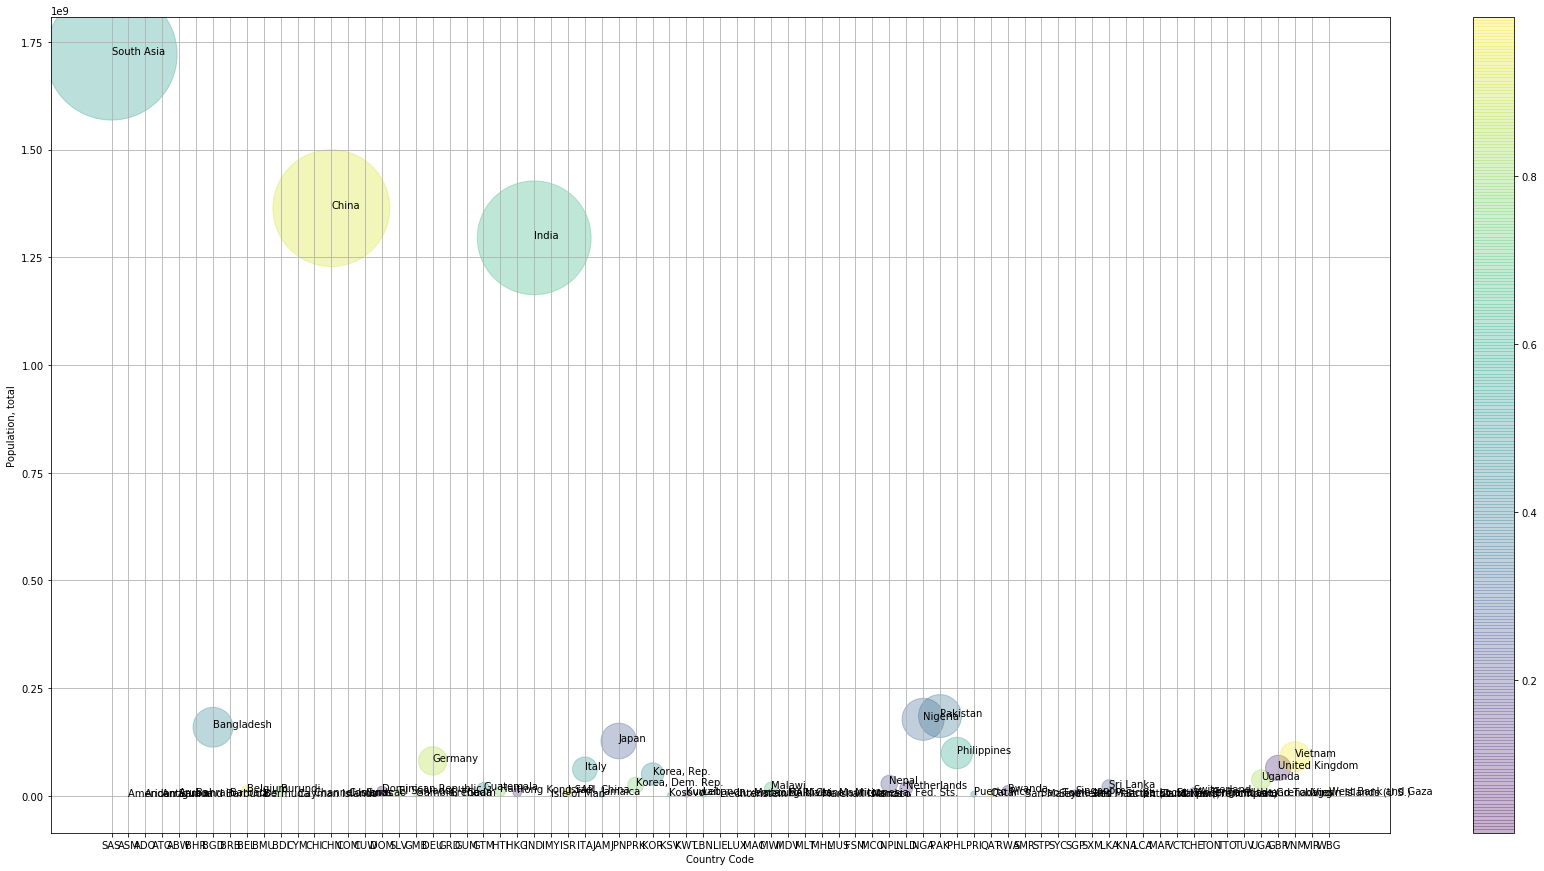

In [30]:
# Create a scatter plot on Population Total

cntry = pop_den_pop_tot1['CountryName'].values

x = pop_den_pop_tot1['CountryCode'].values 
y = pop_den_pop_tot1['Value_popTotal'].values

rng = np.random.RandomState(0)
colors = rng.rand(73)
sizes = y/100000

fig = plt.figure(figsize=(30,15))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]))

plt.xlabel('Country Code')
plt.ylabel(pop_den_pop_tot1['Indicator_popTotal'].iloc[0])
plt.show()

Total Population plot have an entirely different story to tell. The total population of some bigger countries like China, India have very high values than rest of the countries. Other bigger countries like Russia, Canada, USA, Brazil, and Australia are not figuring at all in this plot.<br /><br />
Also, the smaller countries which figured in the earlier scatter plots are also not showing up in this plot at all.<br /><br />

## Population Growth Comparision ##

Comparing Population Growth data of **India** with two other countries say, **China** and **USA**

In [31]:
# Looking for Population Growth data of India, China, and USA to compare

pop_den_indic = 'Population growth'
pop_cntry_ind = 'IND'
pop_cntry_chn = 'CHN'
pop_cntry_usa = 'USA'

mask1 = pdata['IndicatorName'].str.contains(pop_den_indic)
mask2 = pdata['CountryCode'].str.contains(pop_cntry_ind)
mask3 = pdata['CountryCode'].str.contains(pop_cntry_chn)
mask4 = pdata['CountryCode'].str.contains(pop_cntry_usa)

pop_data_ind = pdata[mask1 & mask2]
pop_data_chn = pdata[mask1 & mask3]
pop_data_usa = pdata[mask1 & mask4]

pop_data_ind.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11750,India,IND,Population growth (annual %),SP.POP.GROW,1960,1.952206
36703,India,IND,Population growth (annual %),SP.POP.GROW,1961,1.988187
64246,India,IND,Population growth (annual %),SP.POP.GROW,1962,2.020621


In [32]:
pop_data_chn.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7241,China,CHN,Population growth (annual %),SP.POP.GROW,1960,1.832868
31564,China,CHN,Population growth (annual %),SP.POP.GROW,1961,-1.015528
58745,China,CHN,Population growth (annual %),SP.POP.GROW,1962,0.820456


In [33]:
pop_data_usa.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22366,United States,USA,Population growth (annual %),SP.POP.GROW,1960,1.701993
48846,United States,USA,Population growth (annual %),SP.POP.GROW,1961,1.657730
77234,United States,USA,Population growth (annual %),SP.POP.GROW,1962,1.537997


In [34]:
# How many years of Population Growth data present for India, China, and USA?

pop_yrs_ind = pop_data_ind['Year'].unique().tolist()
print("\nIndia, years of data:", len(pop_yrs_ind))

pop_yrs_chn = pop_data_chn['Year'].unique().tolist()
print("China, years of data:", len(pop_yrs_chn))

pop_yrs_usa = pop_data_usa['Year'].unique().tolist()
print("USA, years of data:", len(pop_yrs_usa))


India, years of data: 55
China, years of data: 55
USA, years of data: 55


In [35]:
# From which year to which year, Population Growth data present for India, China, and USA?

print("\nIndia data:", min(pop_yrs_ind)," to ",max(pop_yrs_ind))
print("China data:", min(pop_yrs_chn)," to ",max(pop_yrs_chn))
print("USA data:", min(pop_yrs_usa)," to ",max(pop_yrs_usa))


India data: 1960  to  2014
China data: 1960  to  2014
USA data: 1960  to  2014


So, the **number of years** and **range of years** is same for all the three countries under observation.

In [36]:
# Population Growth ranges for India, China, and USA

pop_val_ind = pop_data_ind['Value']
pop_val_chn = pop_data_chn['Value']
pop_val_usa = pop_data_usa['Value']

print("\nPopulation Growth range")
print("For India:", min(pop_val_ind)," to ",max(pop_val_ind))
print("For China:", min(pop_val_chn)," to ",max(pop_val_chn))
print("For USA:", min(pop_val_usa)," to ",max(pop_val_usa))


Population Growth range
For India: 1.2267302957278898  to  2.33079891921059
For China: -1.01552778731319  to  2.78733183821693
For USA: 0.742746143848123  to  1.70199277744096


### Plotting Population Growth data ###

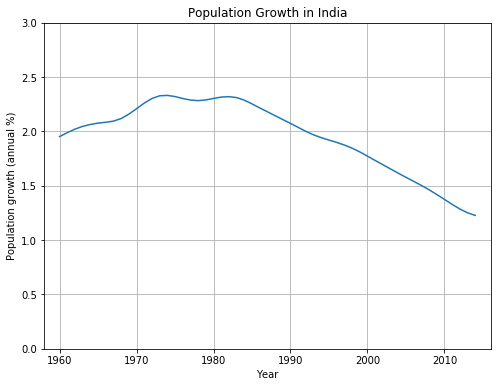

In [37]:
# Taking the years and population growth values from above i.e. "pop_yrs_ind", and "pop_val_ind"

fig = plt.figure(figsize=(8,6))

# Create a line plot
plt.plot(pop_yrs_ind, pop_val_ind)

# Label the axes
plt.xlabel('Year')
plt.ylabel(pop_data_ind['IndicatorName'].iloc[0])

# Label the plot
plt.title('Population Growth in India')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 3])
plt.grid(True)

plt.show(fig)

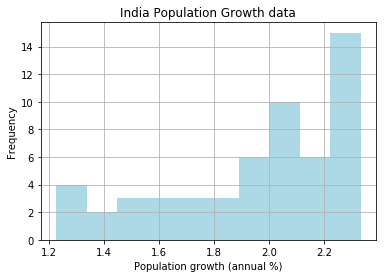

In [38]:
# Histogram plot of the Population Growth data of India

plt.hist(pop_val_ind, 10, density=False, facecolor='lightblue')

plt.xlabel(pop_data_ind['IndicatorName'].iloc[0])
plt.ylabel('Frequency')
plt.title('India Population Growth data')

plt.grid(True)

plt.show()

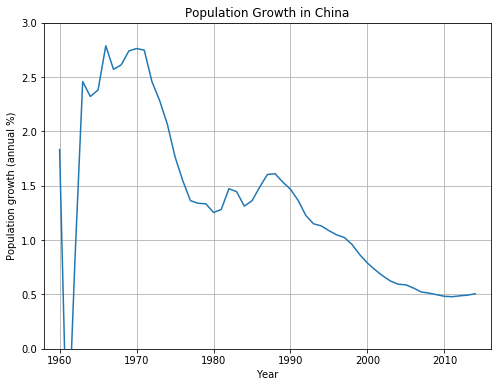

In [39]:
# Taking the years and population growth values from above i.e. "pop_yrs_chn", and "pop_val_chn"

fig = plt.figure(figsize=(8,6))

# create a line plot
plt.plot(pop_yrs_chn, pop_val_chn)

# Label the axes
plt.xlabel('Year')
plt.ylabel(pop_data_chn['IndicatorName'].iloc[0])

# Label the plot
plt.title('Population Growth in China')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 3])
plt.grid(True)

plt.show(fig)

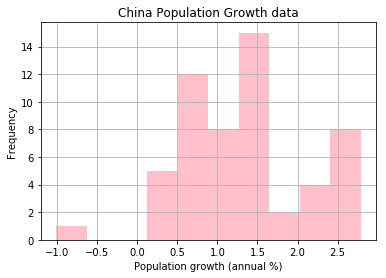

In [40]:
# Histogram plot of the Population Growth data of China

plt.hist(pop_val_chn, 10, density=False, facecolor='pink')

plt.xlabel(pop_data_chn['IndicatorName'].iloc[0])
plt.ylabel('Frequency')
plt.title('China Population Growth data')

plt.grid(True)

plt.show()

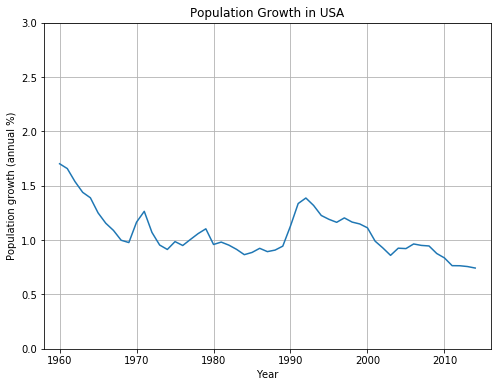

In [41]:
# Taking the years and population growth values from above i.e. "pop_yrs_usa", and "pop_val_usa"

fig = plt.figure(figsize=(8,6))

# create a line plot
plt.plot(pop_yrs_usa, pop_val_usa)

# Label the axes
plt.xlabel('Year')
plt.ylabel(pop_data_usa['IndicatorName'].iloc[0])

# Label the plot
plt.title('Population Growth in USA')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 3])
plt.grid(True)

plt.show(fig)

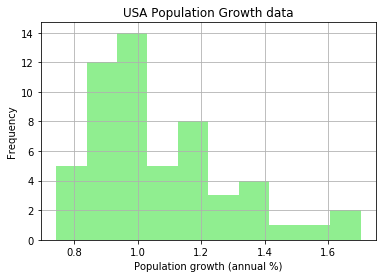

In [42]:
# Histogram plot of the Population Growth data of USA

plt.hist(pop_val_usa, 10, density=False, facecolor='lightgreen')

plt.xlabel(pop_data_usa['IndicatorName'].iloc[0])
plt.ylabel('Frequency')
plt.title('USA Population Growth data')

plt.grid(True)

plt.show()

### Comparing India, China, and USA in one plot ###
India, China, and USA 

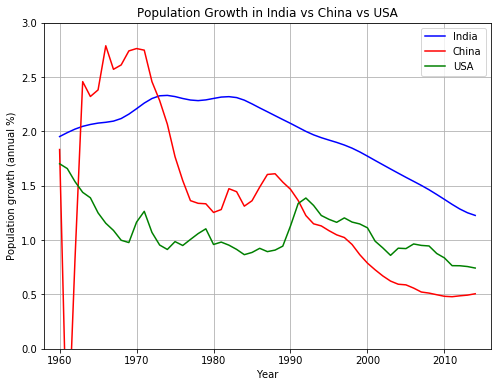

In [43]:
# For y axis, taking the population growth values from above i.e. "pop_val_ind", "pop_val_chn", and "pop_val_usa"
# For x axis, taking the same value as "pop_yrs_ind" for all three because the year range is same for all

fig = plt.figure(figsize=(8,6))

plt.plot(pop_yrs_ind, pop_val_ind, 'b-', label='India')
plt.plot(pop_yrs_ind, pop_val_chn, 'r-', label='China')
plt.plot(pop_yrs_ind, pop_val_usa, 'g-', label='USA')

# Create a legend
plt.legend(loc='upper right')

# Label the axes
plt.xlabel('Year')
plt.ylabel(pop_data_usa['IndicatorName'].iloc[0])

# Label the plot
plt.title('Population Growth in India vs China vs USA')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 3])
plt.grid(True)

plt.show(fig)

From the above comparision plot, it is observed that:
* Population growth is actually decreasing in all the three countries India, China, and USA
* In USA, the population growth is decreasing in a rather rough pattern as shown by the green line in the plot.
* In China, the population growth increased sharply after 1960, reached peak in around 1970-71, then decreased sharply in the next 10 years till 1980-81. Then with a small interval of population growth till late 80s, it started gradually decreasing since then. And it appears that population growth in China has reaches a flat level as assumed from the red line after 2010 in the plot.
* In India, the population growth increased slowly from 1960, reached some peak in the start of 1980s, and then continuously decreasing since then, as observed from the blue line in the plot.

The above comparision plot is for the **IndicatorName** containing the string as "Population growth". Similarly, we can get comparision plots for the IndicatorName containing the strings as "Population density" or "Population, total".